<a href="https://colab.research.google.com/github/SahilJin123/DeepLearning/blob/main/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np

import PIL.Image as Image

import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers,models,Sequential

In [2]:
Image_shape = (224,224)
classifier = tf.keras.Sequential([
             hub.KerasLayer('https://tfhub.dev/google/imagenet/mobilenet_v2_035_224/classification/4',input_shape = Image_shape + (3,))
])

In [3]:
!wget 'https://raw.githubusercontent.com/SahilJin123/deep-learning-keras-tf-tutorial/master/18_transfer_learning/ImageNetLabels.txt'

--2022-07-11 20:43:36--  https://raw.githubusercontent.com/SahilJin123/deep-learning-keras-tf-tutorial/master/18_transfer_learning/ImageNetLabels.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10484 (10K) [text/plain]
Saving to: ‘ImageNetLabels.txt’

ImageNetLabels.txt  100%[===================>]  10.24K  --.-KB/s    in 0s      

2022-07-11 20:43:36 (66.5 MB/s) - ‘ImageNetLabels.txt’ saved [10484/10484]



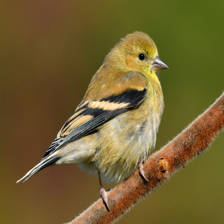

In [4]:
#pick any gold finch image
gold_finch = Image.open('/content/1800.jpg').resize(Image_shape)
gold_finch

In [5]:
gold_finch = np.array(gold_finch)/255.0
gold_finch.shape

(224, 224, 3)

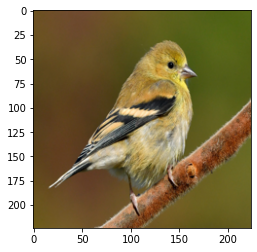

In [6]:
plt.imshow(gold_finch) 

In [7]:
#we our adding new axis to it bcz prediction doesn't 
#accept only one image it acccepts multiple images while prediction
gold_finch[np.newaxis,...].shape

(1, 224, 224, 3)

In [8]:
result = classifier.predict(gold_finch[np.newaxis,...])

In [9]:
result.shape

(1, 1001)

In [10]:
predicted_label = np.argmax(result)
predicted_label

12

In [11]:
img_labels =[]
with open('/content/ImageNetLabels.txt') as f:
  img_labels = f.read().splitlines()

In [12]:
img_labels[predicted_label]

'goldfinch'

## **Applying Transfer Learning on Flower Dataset**

In [13]:
!wget "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

--2022-07-11 20:43:47--  https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/x-compressed-tar]
Saving to: ‘flower_photos.tgz’

flower_photos.tgz   100%[===================>] 218.21M   310MB/s    in 0.7s    

2022-07-11 20:43:48 (310 MB/s) - ‘flower_photos.tgz’ saved [228813984/228813984]



In [14]:
!tar -xvf  '/content/flower_photos.tgz'

flower_photos/
flower_photos/roses/
flower_photos/roses/14810868100_87eb739f26_m.jpg
flower_photos/roses/1446090416_f0cad5fde4.jpg
flower_photos/roses/15319767030_e6c5602a77_m.jpg
flower_photos/roses/15032112248_30c5284e54_n.jpg
flower_photos/roses/7211616670_2d49ecb3a5_m.jpg
flower_photos/roses/15674450867_0ced942941_n.jpg
flower_photos/roses/17158274118_00ec99a23c.jpg
flower_photos/roses/14019883858_e5d2a0ec10_n.jpg
flower_photos/roses/8035908422_87220425d2_n.jpg
flower_photos/roses/14747962886_2bff6bb323_m.jpg
flower_photos/roses/4356781875_92c5cd93c0.jpg
flower_photos/roses/8524505546_b242bd4928_n.jpg
flower_photos/roses/9406573080_60eab9278e_n.jpg
flower_photos/roses/6039330368_c30ed224c4_m.jpg
flower_photos/roses/14414100710_753a36fce9.jpg
flower_photos/roses/3292434691_392071d702_n.jpg
flower_photos/roses/5273722065_c85d8543c2_m.jpg
flower_photos/roses/2215318403_06eb99176a.jpg
flower_photos/roses/172311368_49412f881b.jpg
flower_photos/roses/15255964454_0a64eb67fa.jpg
flower_pho

In [15]:
import glob

In [16]:
roses = []
for images in glob.glob('/content/flower_photos/roses/*.jpg'):
  roses.append(images)

roses[:5]

['/content/flower_photos/roses/483444865_65962cea07_m.jpg',
 '/content/flower_photos/roses/9433167170_fa056d3175.jpg',
 '/content/flower_photos/roses/4654893119_45d232016b.jpg',
 '/content/flower_photos/roses/2735666555_01d53e74fe.jpg',
 '/content/flower_photos/roses/1645761726_2b1be95472.jpg']

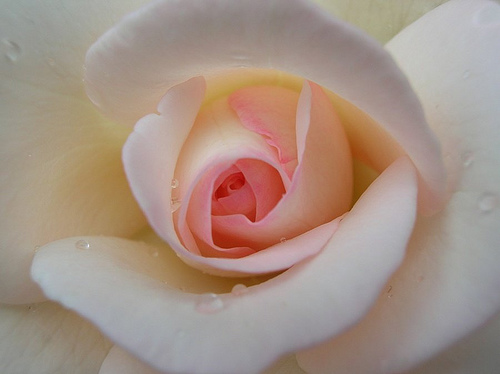

In [17]:
Image.open(roses[3])

In [18]:
tulips = []
for images in glob.glob('/content/flower_photos/tulips/*.jpg'):
  tulips.append(images)


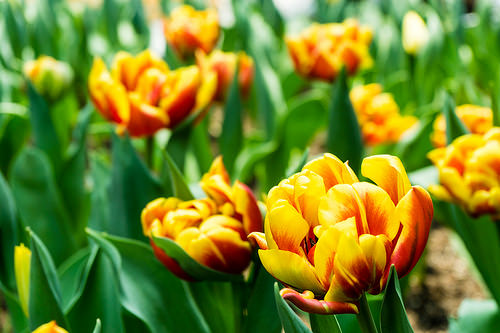

In [19]:
Image.open(tulips[3])

In [20]:
sunflowers = []
for images in glob.glob('/content/flower_photos/sunflowers/*.jpg'):
  sunflowers.append(images)

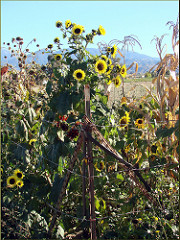

In [21]:
Image.open(sunflowers[3])

In [22]:
dandelion = []
for images in glob.glob('/content/flower_photos/dandelion/*.jpg'):
  dandelion.append(images)

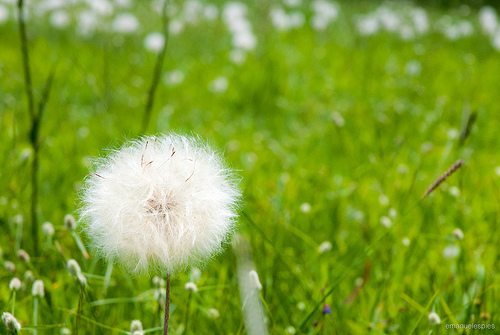

In [23]:
Image.open(dandelion[3])

In [24]:
daisy = []
for images in glob.glob('/content/flower_photos/daisy/*.jpg'):
  daisy.append(images)

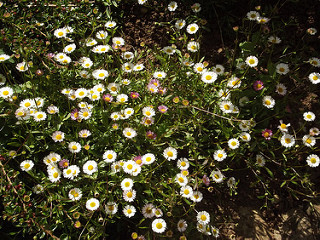

In [25]:
Image.open(daisy[3])

In [26]:
flowers_image_dictionary = {
    'roses':roses,
    'daisy':daisy,
    'dandelion':dandelion,
    'sunflowers':sunflowers,
    'tulips':tulips,
}

In [27]:
flowers_labels_dictionary = {
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
}

In [28]:
x=[]
y=[]
for flower_name,images in flowers_image_dictionary.items():
  for image in images:
    img = cv2.imread(image)
    resized_img = cv2.resize(img,Image_shape)
    x.append(resized_img)
    y.append(flowers_labels_dictionary[flower_name])

In [29]:
x = np.array(x)
y = np.array(y)

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [31]:
x_train_scaled = x_train/255

In [32]:
x_train_scaled[0]

array([[[0.50980392, 0.49803922, 0.32156863],
        [0.50980392, 0.49803922, 0.32156863],
        [0.50980392, 0.49803922, 0.32156863],
        ...,
        [0.4745098 , 0.4627451 , 0.28627451],
        [0.4745098 , 0.4627451 , 0.28627451],
        [0.4745098 , 0.4627451 , 0.28627451]],

       [[0.50980392, 0.49803922, 0.32156863],
        [0.50980392, 0.49803922, 0.32156863],
        [0.51372549, 0.50196078, 0.3254902 ],
        ...,
        [0.47058824, 0.45882353, 0.28235294],
        [0.47058824, 0.45882353, 0.28235294],
        [0.47058824, 0.45882353, 0.28235294]],

       [[0.50980392, 0.49803922, 0.32156863],
        [0.50980392, 0.49803922, 0.32156863],
        [0.51372549, 0.50196078, 0.3254902 ],
        ...,
        [0.46666667, 0.45490196, 0.27843137],
        [0.46666667, 0.45490196, 0.27843137],
        [0.46666667, 0.45490196, 0.27843137]],

       ...,

       [[0.39215686, 0.36862745, 0.2       ],
        [0.39215686, 0.36862745, 0.2       ],
        [0.39607843, 0

In [33]:
x_test_scaled = x_test/255

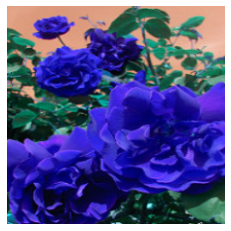

In [34]:
plt.axis('off')
plt.imshow(x[0])

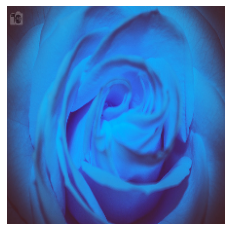

In [35]:
plt.axis('off')
plt.imshow(x[1])

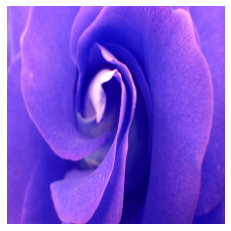

In [36]:
plt.axis('off')
plt.imshow(x[2])

In [37]:
predict = classifier.predict(np.array([x[0],x[1],x[2]]))
predict = np.argmax(predict,axis =1)
predict

array([923, 816, 816])

In [38]:
#image_labels[923]

In [42]:
img_labels[923]

'menu'

In [43]:
img_labels[816]

'spider web'

In [44]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [45]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [47]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(x_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 8s 42ms/step - loss: 0.8145 - acc: 0.6915
Epoch 2/5
86/86 [==============================] - 4s 41ms/step - loss: 0.4112 - acc: 0.8605
Epoch 3/5
86/86 [==============================] - 4s 41ms/step - loss: 0.3225 - acc: 0.8928
Epoch 4/5
86/86 [==============================] - 4s 41ms/step - loss: 0.2742 - acc: 0.9139
Epoch 5/5
86/86 [==============================] - 4s 41ms/step - loss: 0.2255 - acc: 0.9382


In [49]:
model.evaluate(x_test_scaled,y_test)

29/29 [==============================] - 2s 45ms/step - loss: 0.3997 - acc: 0.8649


[0.39968663454055786, 0.8649237751960754]